# Importing libraries

In [515]:
#!pip install imbalanced-learn

In [516]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Loading and exploring the dataset

In [517]:
df=pd.read_csv('/content/drive/MyDrive/HTU- second year- second semester/AI/Airlines.csv')

In [518]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [519]:
df.shape

(539383, 9)

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [521]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


# Data preprocessing and EDA

### Dropping unnecessary columns

In [522]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [523]:
df=df.drop(['id'],axis=1)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


### Checking for outliers

In [524]:
mean = df['Length'].mean()
std = df['Length'].std()
df1=df.copy()
df1['z_score'] = (df['Length'] - mean) / std

In [525]:
df1['outlier_zscore'] = df1['z_score'] > 3
outliers_zscore = df1[df1['outlier_zscore'] == True]
outliers_zscore

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,z_score,outlier_zscore
23,HA,17,LAS,HNL,3,100,380,1,3.534064,True
433,UA,303,JFK,SFO,3,360,404,0,3.876349,True
677,UA,893,BOS,SFO,3,370,410,0,3.961920,True
682,US,506,BOS,PHX,3,370,364,0,3.305874,True
808,UA,185,PHL,SFO,3,377,389,0,3.662420,True
...,...,...,...,...,...,...,...,...,...,...
539353,US,31,OGG,PHX,5,1410,344,0,3.020636,True
539356,UA,92,OGG,DEN,5,1416,404,0,3.876349,True
539365,US,119,KOA,PHX,5,1425,349,1,3.091946,True
539369,US,125,HNL,PHX,5,1430,362,0,3.277350,True


In [526]:
# IQR method
q1 = df['Length'].quantile(0.25)
q3 = df['Length'].quantile(0.75)
iqr = q3 - q1
df1['outlier_iqr'] = ((df1['Length'] < (q1 - 1.5 * iqr)) | (df1['Length'] > (q3 + 1.5 * iqr)))

outliers_iqr = df1[df1['outlier_iqr'] == True]
outliers_iqr

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,z_score,outlier_zscore,outlier_iqr
23,HA,17,LAS,HNL,3,100,380,1,3.534064,True,True
24,US,122,ANC,PHX,3,113,327,1,2.778184,False,True
233,AA,552,SFO,MIA,3,360,315,1,2.607042,False,True
265,DL,1084,ANC,MSP,3,360,326,0,2.763922,False,True
430,UA,226,SFO,BOS,3,360,342,0,2.992112,False,True
...,...,...,...,...,...,...,...,...,...,...,...
539373,B6,480,LAX,BOS,5,1435,320,1,2.678351,False,True
539378,CO,178,OGG,SNA,5,1439,326,0,2.763922,False,True
539379,FL,398,SEA,ATL,5,1439,305,0,2.464423,False,True
539381,UA,78,HNL,SFO,5,1439,313,1,2.578518,False,True


In [527]:
dfMaxLength= df1[df1['Length'] == 655.000000].copy()
dfMaxLength

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,z_score,outlier_zscore,outlier_iqr
7104,CO,15,EWR,HNL,3,710,655,1,7.456079,True,True
24930,CO,15,EWR,HNL,4,710,655,1,7.456079,True,True
43007,CO,15,EWR,HNL,5,710,655,1,7.456079,True,True
60155,CO,15,EWR,HNL,6,710,655,1,7.456079,True,True
74496,CO,15,EWR,HNL,7,710,655,1,7.456079,True,True
92565,CO,15,EWR,HNL,1,710,655,1,7.456079,True,True
110171,CO,15,EWR,HNL,2,710,655,1,7.456079,True,True
127451,CO,15,EWR,HNL,3,710,655,0,7.456079,True,True
145250,CO,15,EWR,HNL,4,710,655,0,7.456079,True,True
163328,CO,15,EWR,HNL,5,710,655,0,7.456079,True,True


### Visualization

In [528]:
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0


In [529]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

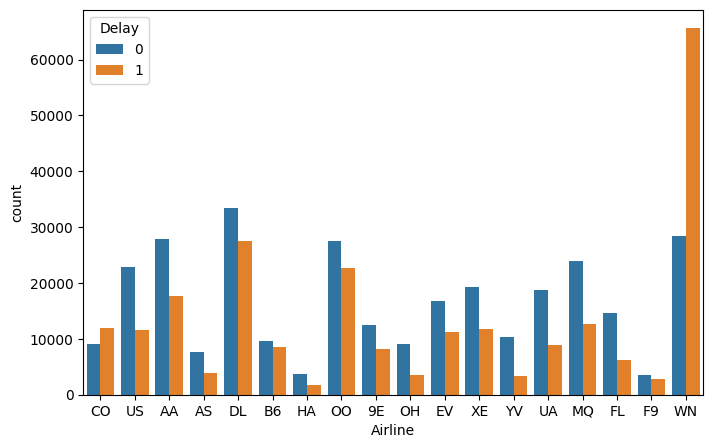

In [530]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Airline',hue='Delay',data=df)
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

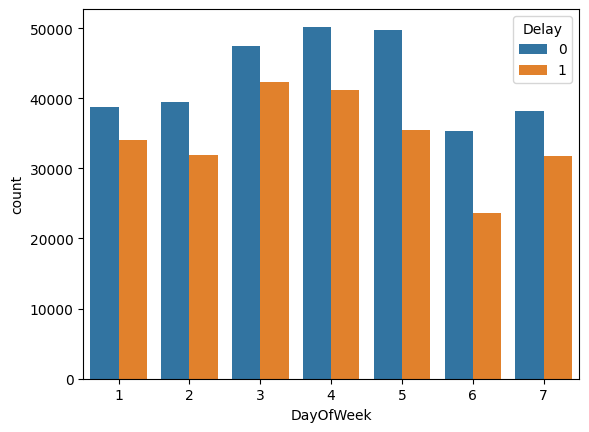

In [531]:
sns.countplot(x='DayOfWeek',hue='Delay',data=df)

<ipython-input-532-0a5bb2f6ad76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidths=5)


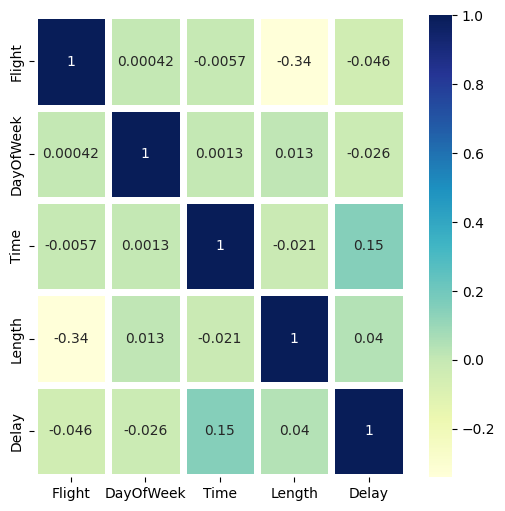

In [532]:
fig,ax = plt.subplots(figsize=(6,6))
dataplot=sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,linewidths=5)

### Transforming columns and scaling

In [533]:
df['Length'] = df['Length'] / 60
df['Time'] = df['Time'] / 60
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,0.250000,3.416667,1
1,US,1558,PHX,CLT,3,0.250000,3.700000,1
2,AA,2400,LAX,DFW,3,0.333333,2.750000,1
3,AA,2466,SFO,DFW,3,0.333333,3.250000,1
4,AS,108,ANC,SEA,3,0.500000,3.366667,0


In [534]:
scaler = MinMaxScaler()
cat_columns=['Length','Time']
df[cat_columns] = scaler.fit_transform(df[cat_columns])
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,0.003499,0.312977,1
1,US,1558,PHX,CLT,3,0.003499,0.338931,1
2,AA,2400,LAX,DFW,3,0.006998,0.251908,1
3,AA,2466,SFO,DFW,3,0.006998,0.297710,1
4,AS,108,ANC,SEA,3,0.013996,0.308397,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1.000000,0.497710,0
539379,FL,398,SEA,ATL,5,1.000000,0.465649,0
539380,FL,609,SFO,MKE,5,1.000000,0.389313,0
539381,UA,78,HNL,SFO,5,1.000000,0.477863,1


### Balancing and undersampling

<Axes: xlabel='Delay', ylabel='count'>

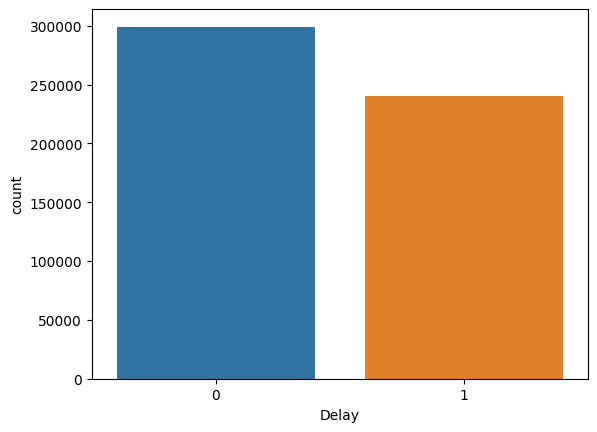

In [535]:
sns.countplot(data=df, x='Delay')

In [536]:
df['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [537]:
X = df.drop('Delay',axis=1)
y = df['Delay']

In [538]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
df_resampled = pd.concat([X_under, y_under], axis=1)

In [539]:
df_resampled['Delay'].value_counts()

0    240264
1    240264
Name: Delay, dtype: int64

<Axes: xlabel='Delay', ylabel='count'>

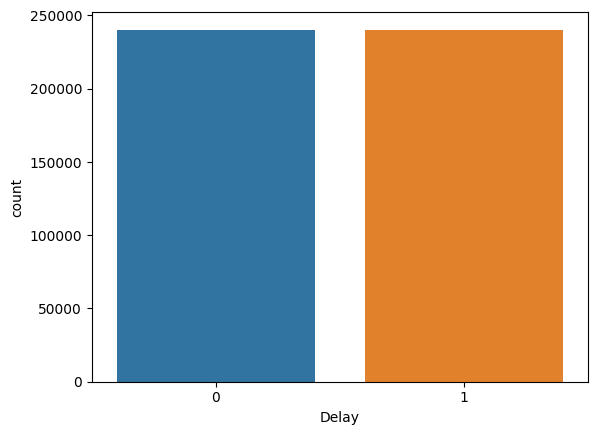

In [540]:
sns.countplot(data=df_resampled, x='Delay')

### Encoding categorical variables

In [541]:
df_resampled.dtypes

Airline         object
Flight           int64
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Time           float64
Length         float64
Delay            int64
dtype: object

In [542]:
label_encoder = LabelEncoder()
df_resampled['Airline'] = label_encoder.fit_transform(df_resampled['Airline'])
df_resampled['AirportFrom'] = label_encoder.fit_transform(df_resampled['AirportFrom'])
df_resampled['AirportTo'] = label_encoder.fit_transform(df_resampled['AirportTo'])

In [543]:
df_resampled.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,0,3680,22,85,4,0.374388,0.196947,0
1,0,4095,197,247,4,0.811756,0.132824,0
2,15,102,253,243,1,0.605318,0.129771,0
3,3,477,35,154,2,0.356893,0.596947,0
4,6,5406,71,78,3,0.662701,0.132824,0


# ML model

In [544]:
X = df_resampled.drop('Delay',axis=1)
y = df_resampled['Delay']

In [545]:
dtree = DecisionTreeClassifier(max_depth=15)

In [546]:
sfs = SequentialFeatureSelector(dtree, n_features_to_select=5, direction='forward')
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Airline', 'AirportFrom', 'AirportTo', 'Time', 'Length'], dtype='object')


In [547]:
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
acclst=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.30, random_state=i)
  dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  sum_acc = sum_acc + acc
  acclst.append(acc)
  rec = recall_score(y_test,y_pred)
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred)
  sum_pre = sum_pre + pre
  f1= f1_score(y_test,y_pred)
  sum_f1 = sum_f1 + f1
print('Average Accuracy:', round(sum_acc/10,3))
print('Average Recall:', round(sum_rec/10,3))
print('Average Precision:', round(sum_pre/10,3))
print('Average F1-Score:', round(sum_f1/10,3))

Average Accuracy: 0.642
Average Recall: 0.625
Average Precision: 0.647
Average F1-Score: 0.636


Text(0.5, 1.0, 'Accuracy results')

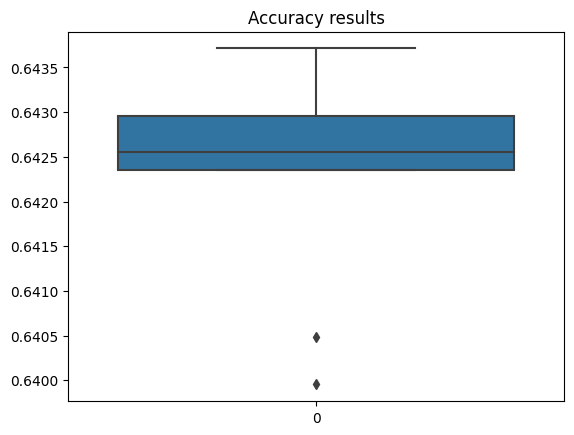

In [548]:
sns.boxplot(acclst)
plt.title('Accuracy results')

# ANN model

In [549]:
classifier = Sequential()

In [550]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0)

In [551]:
classifier.add(Dense(units = 12, activation = 'relu', input_shape=X_train[0].shape))

In [552]:
classifier.add(Dense(units = 8, activation = 'relu'))

In [553]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [554]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [555]:
classifier.fit(X_train, y_train, batch_size = 64, epochs = 10)

Epoch 1/10
6007/6007 [==============================] - 13s 2ms/step - loss: 1.7481 - accuracy: 0.5131
Epoch 2/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.9070 - accuracy: 0.5201
Epoch 3/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.8733 - accuracy: 0.5243
Epoch 4/10
6007/6007 [==============================] - 11s 2ms/step - loss: 0.8484 - accuracy: 0.5282
Epoch 5/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.8314 - accuracy: 0.5323
Epoch 6/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.8272 - accuracy: 0.5358
Epoch 7/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.7986 - accuracy: 0.5365
Epoch 8/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.8118 - accuracy: 0.5364
Epoch 9/10
6007/6007 [==============================] - 12s 2ms/step - loss: 0.7829 - accuracy: 0.5384
Epoch 10/10
6007/6007 [==============================] - 11s 2ms/step - l

In [556]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3004/3004 [==============================] - 4s 1ms/step


In [557]:
rec = round(recall_score(y_test,y_pred),3)
pre =  round(precision_score(y_test,y_pred),3)
f1 = round(f1_score(y_test,y_pred),3)
acc = round(accuracy_score(y_test,y_pred),3)

print('Recall:', rec)
print('Precision:', pre)
print('F1-Score:', f1)
print('Accuracy:', acc)

Recall: 0.562
Precision: 0.565
F1-Score: 0.564
Accuracy: 0.567
